In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["Heiti TC"] #设置字体
plt.rcParams["axes.unicode_minus"] = False  #该语句解决图像中的“-”负号的乱码问题

In [478]:
data = {
    '总销量': [5280000, 5501000, 5469000, 5480000, 5533000, 5554000],
    '目标销量': [5280000, 5500000, 5729000, 5968000, 6217000, 6476000],
    '广告费': [1056000, 950400, 739200, 528000, 316800, 316800],
    '社会网络费': [0, 105600, 316800, 528000, 739200, 739200],
    '单价': [2, 2, 2, 1.9, 1.9, 1.9]
}
date = pd.date_range('2021-09-30', periods=6, freq='M')
df = pd.DataFrame(data=data, index=date)
df

,总销量,目标销量,广告费,社会网络费,单价
2021-09-30,5280000,5280000,1056000,0,2.0
2021-10-31,5501000,5500000,950400,105600,2.0
2021-11-30,5469000,5729000,739200,316800,2.0
2021-12-31,5480000,5968000,528000,528000,1.9
2022-01-31,5533000,6217000,316800,739200,1.9
2022-02-28,5554000,6476000,316800,739200,1.9


In [479]:
# 获取销量增长率
df=(
    df
    .assign(销量增长率=df.总销量.pct_change(1))
    .assign(目标销量增长率=df.目标销量.pct_change(1))
    .assign(销量=df.总销量 / df.单价)
    # (df.总销量.diff(1).fillna(0)/df.总销量.shift(1)).fillna(0).apply(lambda y:format(y,'.3%'))
    .fillna(0)
    .assign(年月=df.index)
)
df

,总销量,目标销量,广告费,社会网络费,单价,销量增长率,目标销量增长率,销量,年月
2021-09-30,5280000,5280000,1056000,0,2.0,0.000000,0.000000,2.640000e+06,2021-09-30
2021-10-31,5501000,5500000,950400,105600,2.0,0.041856,0.041667,2.750500e+06,2021-10-31
2021-11-30,5469000,5729000,739200,316800,2.0,-0.005817,0.041636,2.734500e+06,2021-11-30
2021-12-31,5480000,5968000,528000,528000,1.9,0.002011,0.041718,2.884211e+06,2021-12-31
2022-01-31,5533000,6217000,316800,739200,1.9,0.009672,0.041723,2.912105e+06,2022-01-31
2022-02-28,5554000,6476000,316800,739200,1.9,0.003795,0.041660,2.923158e+06,2022-02-28


In [480]:
df1 = (
    df
    .assign(xlabel1=df.年月.apply(lambda y: str(y.year) + '-' + str(y.month)))
    .assign(销量增长率_format=df.销量增长率.apply(lambda y: '%.3f' % (y * 100) + '%'))
    .assign(广告费合计=df.广告费 + df.社会网络费)
)

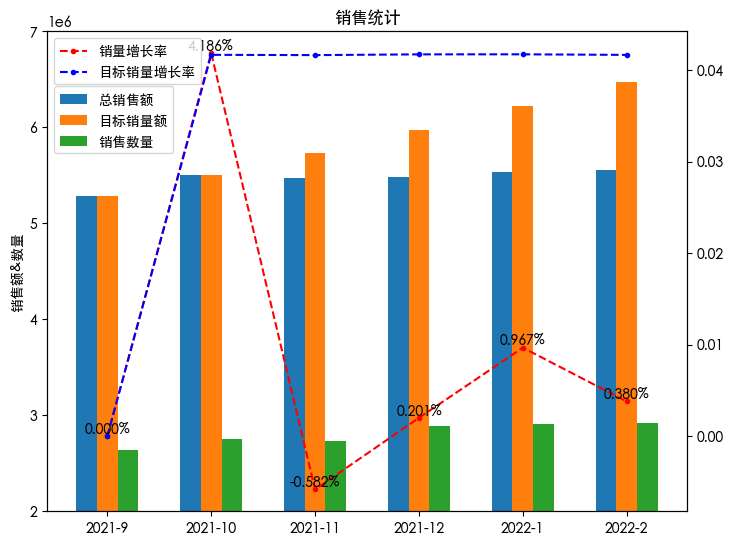

In [475]:
fig = plt.figure()
x = np.arange(1, len(df.index) + 1)
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x-0.2, df1.总销量, width=0.2)
ax.bar(x, df1.目标销量, width=0.2)
ax.bar(x + 0.2, df1.销量, width=0.2)
ax.set_ylim(2000000, 7000000)
ax.set_ylabel('销售额&数量')  #设置Y轴名称
ax.set_xticks(x)
ax.set_xticklabels(df1.xlabel1)
ax.legend(labels=('总销售额', '目标销量额','销售数量'), loc='upper left', bbox_to_anchor=(0, 0.9))
ax_2 = ax.twinx()
ax_2.plot(x, df1.销量增长率, 'r--.')
ax_2.plot(x, df1.目标销量增长率, 'b--.')
for x1, y1 in zip(x, df1.销量增长率):  # x,y表示显示内容的坐标位置
    plt.text(x1, y1, '%.3f' % (y1 * 100) + '%', ha='center', va='bottom', fontsize=10)
plt.title('销售统计')  #设置图表标题
plt.legend(labels=('销量增长率','目标销量增长率'), loc='best')
plt.show()

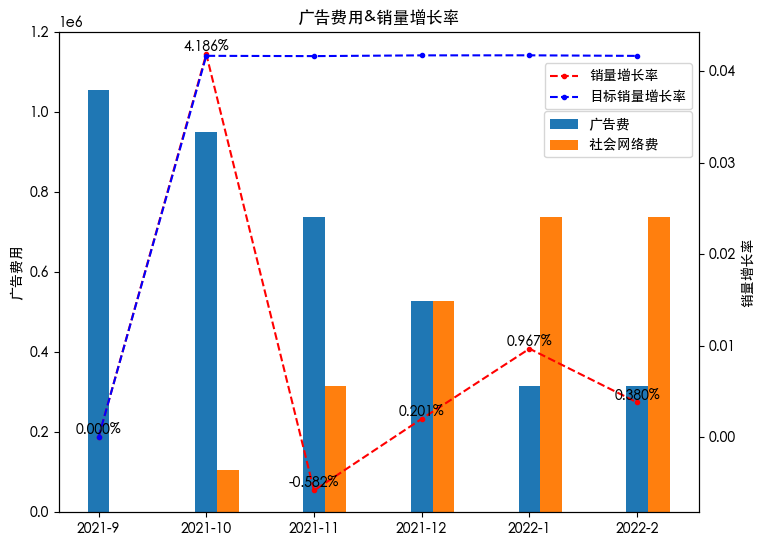

In [476]:
fig = plt.figure()
x = np.arange(1, len(df.index) + 1)
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x, df1.广告费, width=0.2)
ax.bar(x + 0.2, df1.社会网络费, width=0.2)
ax.set_ylabel('广告费用')
ax.set_ylim(0, 1200000)
ax_2 = ax.twinx()
ax_2.set_ylabel('销量增长率')  #设置Y轴名称
ax_2.set_xticks(x)
ax_2.set_xticklabels(df1.xlabel1)
ax_2.plot(x, df1.销量增长率, 'r--.')
ax_2.plot(x, df1.目标销量增长率, 'b--.')
plt.title('广告费用&销量增长率')  #设置图表标题
for x1, y1 in zip(x, df1.销量增长率):  # x,y表示显示内容的坐标位置
    plt.text(x1, y1, '%.3f' % (y1 * 100) + '%', ha='center', va='bottom', fontsize=10)
ax_2.legend(labels=('销量增长率','目标销量增长率'), loc='upper right', bbox_to_anchor=(1, 0.95))
ax.legend(labels=('广告费', '社会网络费        '), loc='upper right', bbox_to_anchor=(1, 0.85))
plt.show()

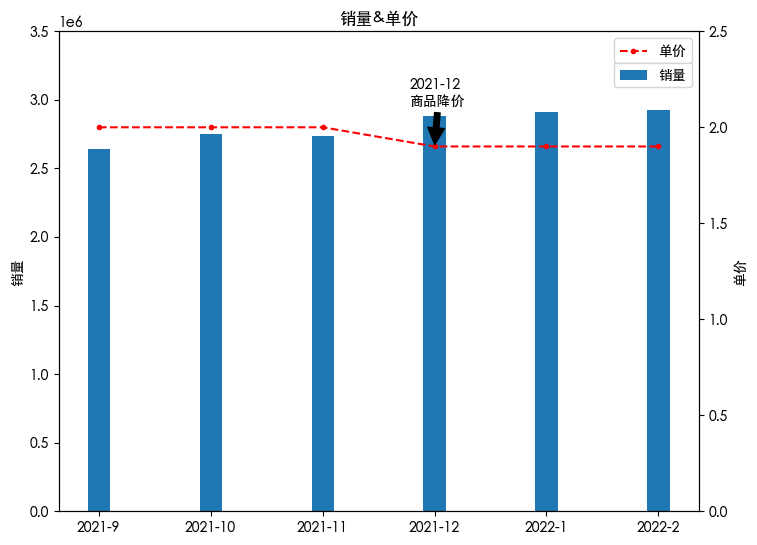

In [436]:
fig = plt.figure()
x = np.arange(1, len(df.index) + 1)
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x, df1.销量, width=0.2)
# ax.bar(x+0.2, df.社会网络费,width=0.2)
ax.set_ylabel('销量')
ax.set_ylim(0, 3500000)
# ax.set_yscale("log")
ax_2 = ax.twinx()
ax_2.set_ylabel('单价')  #设置Y轴名称
ax_2.set_xticks(x)
ax_2.set_xticklabels(df1.xlabel1)
ax_2.set_ylim(0, 2.5)
ax_2.plot(x, df1.单价, 'r--.')
ax_2.annotate('2021-12\n商品降价',
              xy=(4, 1.9),
              xytext=(3.78, 2.1),
              arrowprops=dict(facecolor='black', shrink=0.05),  # 箭头线为黑色，两端缩进5%
              horizontalalignment='left',  # 注释文本的左端和低端对齐到指定位置
              verticalalignment='bottom', )
# for x1, y1 in zip(x, df.销量): # x,y表示显示内容的坐标位置
#     plt.text(x1, y1,y1, ha='center', va='bottom', fontsize=10)
ax.legend(labels=('销量',), loc='upper right', bbox_to_anchor=(1, 0.95))
ax_2.legend(labels=('单价',), loc='best')
plt.title('销量&单价')  #设置图表标题
plt.show()

# 确定问题（管理已知问题（心智模型）、管理的未知问题）>分解问题>评估问题>决策
Step1:确定问题_page7
# 目标、怎么达成目标、是否合理、竞争对手、对数据对疑问
1、目标销量？
2、怎么可以达到？
3、目标是否合理？
4、为什么在2021-10月份开始增加社会网络费？
5、竞争对手销量数据？
6、12月份为什么降价？

Step2:分解数据_page11
用户确认无疑的观点
1、目标用户11～15岁的少女
2、目标用户消费力强
3、总预算费用是第一个月收入的20%
4、广告费（不好社会网络费）降低导致的销量降低
存疑问：竞争对手的收入比我高50%～100%
我对数据的看法
1、广告费降低是不是造成销量降低的原因之一？
2、单价降低是不是造成目标销量降低的原因？
3、目标客户真的只有11～15岁的用户
4、少女的消费能力真的高吗？
5、从11月份开始，总销量与目标销量开始相距甚远

Step4 建议决策_page15
1、单价保持不变，原因：降低单价并没有让销量提升，反而使利润降低
2、提高广告费用，降低社交网络费：从10月以后由于广告费的降低，总销量降低明显

假设_page23
1、降低价格对提高销量影响不大
2、提高价格，对销量影响不大，但是可以提高销售额及利润
3、对少女增加定向广告，对提高销量影响不大
4、若想增加销售额，则需要开发新的产品
5、若想增加销售额，则需要开发新的目标客户

----------------------------------
1、提高价格，销量下滑
2、降低少女大营销费用，销量下降
3、若想增加销售额，则需要增加广告力度
4、用户认为使用貌洁廉价、低端
5、少女改用其他对保湿产品
6、用户不喜欢使用保湿产品了，觉得用后粘稠不舒服

1、如何知道竞争对手的目标客户？
2、如何知道竞争对手的销量？
3、竞争对手的产品使用频率？